<a href="https://colab.research.google.com/github/Maham-Saleem12/m/blob/main/Ann_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import files
uploaded = files.upload()

Saving audit_data.csv to audit_data (1).csv


In [54]:
import io
import pandas as pd

dataset = pd.read_csv('audit_data.csv')

In [55]:
dataset

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


In [56]:
df = dataset.values #convert our dataframe into array

In [57]:

df

array([[ 3.89  , 23.    ,  4.18  , ...,  0.5   ,  1.7148,  1.    ],
       [ 3.89  ,  6.    ,  0.    , ...,  0.5   ,  0.5108,  0.    ],
       [ 3.89  ,  6.    ,  0.51  , ...,  0.5   ,  0.3096,  0.    ],
       ...,
       [55.57  , 14.    ,  0.24  , ...,  0.5   ,  0.2912,  0.    ],
       [55.57  , 18.    ,  0.2   , ...,  0.5   ,  0.288 ,  0.    ],
       [55.57  , 15.    ,  0.    , ...,  0.5   ,  0.2928,  0.    ]])

In [58]:
#split our dataset into X input features and y(predict/label)
X = df[:,0:26]
Y = df[:,26]

In [59]:
#preprocess our dataset/scale/normalize our ds
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [60]:
X

array([[-0.67046481,  0.82543008,  0.30480033, ..., -0.38866169,
         0.        , -0.14112307],
       [-0.67046481, -0.8953464 , -0.43173627, ..., -0.38866169,
         0.        , -0.17228042],
       [-0.67046481, -0.8953464 , -0.34187176, ..., -0.38866169,
         0.        , -0.17748711],
       ...,
       [ 1.45599165, -0.08556924, -0.38944709, ..., -0.38866169,
         0.        , -0.17796327],
       [ 1.45599165,  0.31931935, -0.39649529, ..., -0.38866169,
         0.        , -0.17804608],
       [ 1.45599165,  0.01565291, -0.43173627, ..., -0.38866169,
         0.        , -0.17792186]])

In [61]:
#split ds into test,train
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)
#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)

In [62]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [63]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(543, 26) (116, 26) (117, 26) (543,) (116,) (117,)


In [64]:
#build ann now
#first import keras
from keras.models import Sequential
from keras.layers import Dense
#keras sequential model///store model in variable and describe layer by layer 
model = Sequential([
    Dense(32, activation='relu', input_shape=(26,)),   #first layer with 32 neurons and 26 input features(columns)
    Dense(32, activation='relu'),     #second layer
    Dense(2, activation='sigmoid'),  #third layer with 2 neuron and sigmoid active.
])
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 32)                864       
_________________________________________________________________
dense_64 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_65 (Dense)             (None, 2)                 66        
Total params: 1,986
Trainable params: 1,986
Non-trainable params: 0
_________________________________________________________________


In [65]:
#configure the model, which optimizer algo,loss function, and metrics we use
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [67]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
17/17 [==============================] - 1s 32ms/step - loss: nan - accuracy: 0.5628 - val_loss: nan - val_accuracy: 0.5259
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6212 - val_loss: nan - val_accuracy: 0.5259
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6462 - val_loss: nan - val_accuracy: 0.5259
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6106 - val_loss: nan - val_accuracy: 0.5259
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6578 - val_loss: nan - val_accuracy: 0.5259
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6519 - val_loss: nan - val_accuracy: 0.5259
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6377 - val_loss: nan - val_accuracy: 0.5259
Epoch 8/100
17/17 [==============================] - 0

In [68]:
loss,accuracy = model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.5641


In [69]:

print('Loss: %.2f' % loss)
print('Accuracy is:', accuracy*100)

Loss: nan
Accuracy is: 56.41025900840759


In [70]:
predic=model.predict(X)
print(X)
print("X=%s, Predicted=%s" % (X[0], Y[0]))

[[-0.67046481  0.82543008  0.30480033 ... -0.38866169  0.
  -0.14112307]
 [-0.67046481 -0.8953464  -0.43173627 ... -0.38866169  0.
  -0.17228042]
 [-0.67046481 -0.8953464  -0.34187176 ... -0.38866169  0.
  -0.17748711]
 ...
 [ 1.45599165 -0.08556924 -0.38944709 ... -0.38866169  0.
  -0.17796327]
 [ 1.45599165  0.31931935 -0.39649529 ... -0.38866169  0.
  -0.17804608]
 [ 1.45599165  0.01565291 -0.43173627 ... -0.38866169  0.
  -0.17792186]]
X=[-0.67046481  0.82543008  0.30480033  1.42984618  0.33650215 -0.16582948
 -0.6667522  -0.194121   -0.12750609 -0.25599783 -0.29528463 -0.28481157
 -0.16161448 -0.56989549 -0.18999669 -0.41140172 -0.1650196  -0.41041721
 -0.19669061 -0.24656792 -0.17539763 -0.35250258 -0.16646776 -0.38866169
  0.         -0.14112307], Predicted=1.0


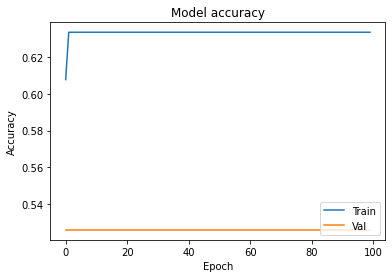

In [71]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

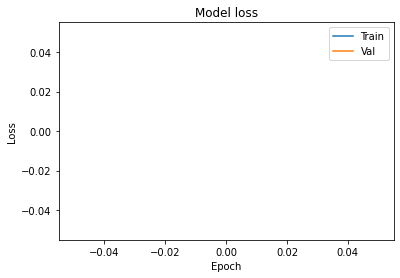

In [72]:

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [73]:
import tensorflow
import keras

#from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend



In [74]:
# define the keras model
model = Sequential()
model.add(Dense(32, input_dim=26, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='linear'))



In [75]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 32)                864       
_________________________________________________________________
dense_67 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_68 (Dense)             (None, 2)                 66        
Total params: 1,986
Trainable params: 1,986
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.fit(X, Y, epochs=100, batch_size=32)


Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: nan - mse: nan  
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: nan - mse: nan
Epoch 11/100
25/25 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 12/100
25/25 [========

In [77]:
# evaluate the keras model
loss,mse = model.evaluate(X, Y)

25/25 [==============================] - 0s 1ms/step - loss: nan - mse: nan


In [78]:
print('Loss: %.2f' % loss)
print('mse: %.2f' % mse)


Loss: nan
mse: nan


In [79]:
predic=model.predict(X)
print(X)
print("X=%s, Predicted=%s" % (X[0], Y[0]))

[[-0.67046481  0.82543008  0.30480033 ... -0.38866169  0.
  -0.14112307]
 [-0.67046481 -0.8953464  -0.43173627 ... -0.38866169  0.
  -0.17228042]
 [-0.67046481 -0.8953464  -0.34187176 ... -0.38866169  0.
  -0.17748711]
 ...
 [ 1.45599165 -0.08556924 -0.38944709 ... -0.38866169  0.
  -0.17796327]
 [ 1.45599165  0.31931935 -0.39649529 ... -0.38866169  0.
  -0.17804608]
 [ 1.45599165  0.01565291 -0.43173627 ... -0.38866169  0.
  -0.17792186]]
X=[-0.67046481  0.82543008  0.30480033  1.42984618  0.33650215 -0.16582948
 -0.6667522  -0.194121   -0.12750609 -0.25599783 -0.29528463 -0.28481157
 -0.16161448 -0.56989549 -0.18999669 -0.41140172 -0.1650196  -0.41041721
 -0.19669061 -0.24656792 -0.17539763 -0.35250258 -0.16646776 -0.38866169
  0.         -0.14112307], Predicted=1.0


In [80]:
from sklearn.model_selection import StratifiedKFold
import numpy
# define 10-fold cross validation 
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=8)
cvscores = []
for train, test in kfold.split(X, Y):

  # create model
  model = Sequential()
  model.add(Dense(32, input_dim=26, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(2, activation='sigmoid'))
	# Compile model
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# Fit the model
  model.fit(X[train], Y[train], epochs=150, batch_size=10, verbose=0)
	# evaluate the model
  scores = model.evaluate(X[test], Y[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

accuracy: 60.26%
accuracy: 60.26%
accuracy: 97.44%
accuracy: 60.26%
accuracy: 60.26%
accuracy: 61.54%
accuracy: 61.04%
accuracy: 61.04%
accuracy: 61.04%
accuracy: 61.04%
64.42% (+/- 11.02%)
